# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import random 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn import svm
import sklearn
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from fancyimpute import KNN
from sklearn.metrics import classification_report

# Data Loading 

In [2]:
# load the csv file 
Absenteeism_train = pd.read_csv('C:/Users/Ruchil/OneDrive/projects/Absenteeism_at_work/Absenteeism_at_work_train.csv')

Absenteeism_test = pd.read_csv('C:/Users/Ruchil/OneDrive/projects/Absenteeism_at_work/Absenteeism_at_work_test.csv')

In [3]:
Absenteeism_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [4]:
Absenteeism_test.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,"246,288",...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,"246,288",...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,"246,288",...,0,1,2,1,0,0,95,196,25,4


In [5]:
Absenteeism_train.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
Absenteeism_test.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,74.000000,74.000000,74.00000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,21.108108,16.932432,5.27027,4.108108,2.472973,205.837838,22.972973,11.243243,36.824324,96.229730,0.054054,1.702703,0.932432,0.418919,0.108108,1.243243,77.378378,174.324324,25.432432,8.472973
std,10.073113,8.927917,1.40739,1.400270,0.879336,70.795098,12.433905,4.474619,7.527772,2.855167,0.227668,0.961302,0.816459,0.496750,0.312636,2.175900,14.445649,6.541978,4.533229,18.295312
min,1.000000,0.000000,0.00000,2.000000,1.000000,118.000000,10.000000,1.000000,28.000000,91.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,14.000000,10.000000,5.00000,3.000000,1.250000,155.000000,13.000000,9.000000,30.250000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,68.000000,171.000000,22.000000,2.000000
50%,22.000000,19.000000,5.00000,4.000000,3.000000,207.000000,21.000000,10.500000,36.500000,96.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,75.000000,172.000000,25.000000,3.000000
75%,28.750000,25.000000,6.00000,5.000000,3.000000,235.000000,26.000000,14.000000,40.000000,99.000000,0.000000,3.000000,2.000000,1.000000,0.000000,2.000000,88.000000,178.000000,28.000000,8.000000
max,36.000000,28.000000,7.00000,6.000000,3.000000,378.000000,52.000000,24.000000,58.000000,99.000000,1.000000,4.000000,3.000000,1.000000,1.000000,8.000000,106.000000,196.000000,38.000000,120.000000


In [7]:
Absenteeism_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [8]:
Absenteeism_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               74 non-null     int64 
 1   Reason for absence               74 non-null     int64 
 2   Month of absence                 74 non-null     int64 
 3   Day of the week                  74 non-null     int64 
 4   Seasons                          74 non-null     int64 
 5   Transportation expense           74 non-null     int64 
 6   Distance from Residence to Work  74 non-null     int64 
 7   Service time                     74 non-null     int64 
 8   Age                              74 non-null     int64 
 9   Work load Average/day            74 non-null     object
 10  Hit target                       74 non-null     int64 
 11  Disciplinary failure             74 non-null     int64 
 12  Education                        74 no

# Data Cleaning 

In [9]:
# Number of Unique values present in each variable
Absenteeism_train.nunique()

ID                                 34
Reason for absence                 28
Month of absence                   12
Day of the week                     5
Seasons                             4
Transportation expense             25
Distance from Residence to Work    24
Service time                       18
Age                                23
Work load Average/day              36
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    16
Absenteeism time in hours          18
dtype: int64

In [10]:
# Number of Unique values present in each variable
Absenteeism_test.nunique()

ID                                 26
Reason for absence                 17
Month of absence                    5
Day of the week                     5
Seasons                             3
Transportation expense             17
Distance from Residence to Work    19
Service time                       15
Age                                17
Work load Average/day               5
Hit target                          5
Disciplinary failure                2
Education                           4
Son                                 4
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             20
Height                             11
Body mass index                    14
Absenteeism time in hours          12
dtype: int64

In [11]:
#"Work load Average/day" has forward slash and we are replacing to avoid any errors
Absenteeism_train.columns = Absenteeism_train.columns.str.replace('/', 'per').str.strip()
Absenteeism_test.columns = Absenteeism_test.columns.str.replace('/', 'per').str.strip()
Absenteeism_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               74 non-null     int64 
 1   Reason for absence               74 non-null     int64 
 2   Month of absence                 74 non-null     int64 
 3   Day of the week                  74 non-null     int64 
 4   Seasons                          74 non-null     int64 
 5   Transportation expense           74 non-null     int64 
 6   Distance from Residence to Work  74 non-null     int64 
 7   Service time                     74 non-null     int64 
 8   Age                              74 non-null     int64 
 9   Work load Averageperday          74 non-null     object
 10  Hit target                       74 non-null     int64 
 11  Disciplinary failure             74 non-null     int64 
 12  Education                        74 no

In [12]:
#The below command returns the count of rows for each ID from the dataset.
Absenteeism_train.groupby('ID')[['ID']].count().head()

,ID
ID,
1,21
2,5
3,113
5,17
6,7


In [13]:
#converting Work load Averageperday to float
Absenteeism_train.rename(columns = {"Work load Averageperday": "Avg_workload"},  
          inplace = True) 
Absenteeism_train["Avg_workload"]=Absenteeism_train["Avg_workload"].str.replace(',', '',regex=True)

Absenteeism_train['Avg_workload']= Absenteeism_train['Avg_workload']. astype('int')

In [14]:
#converting Work load Averageperday to float
Absenteeism_test.rename(columns = {"Work load Averageperday": "Avg_workload"},  
          inplace = True) 
Absenteeism_test["Avg_workload"]=Absenteeism_test["Avg_workload"].str.replace(',', '',regex=True)

Absenteeism_test['Avg_workload']= Absenteeism_test['Avg_workload']. astype('int')

# Missing Values

In [15]:
# missing value check
#Missing value analysis
def missing_data(ab):
    total = ab.isnull().sum()
    percent = (ab.isnull().sum()/ab.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in ab.columns:
        dtype = str(ab[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt

In [16]:
#checking missing value percentage in train data
missing_data(Absenteeism_train)['Percent'].sort_values(ascending=False)

Weight                             0.30030
Hit target                         0.15015
Avg_workload                       0.00000
Reason for absence                 0.00000
Month of absence                   0.00000
Day of the week                    0.00000
Seasons                            0.00000
Transportation expense             0.00000
Distance from Residence to Work    0.00000
Service time                       0.00000
Age                                0.00000
Absenteeism time in hours          0.00000
Body mass index                    0.00000
Disciplinary failure               0.00000
Education                          0.00000
Son                                0.00000
Social drinker                     0.00000
Social smoker                      0.00000
Pet                                0.00000
Height                             0.00000
ID                                 0.00000
Name: Percent, dtype: float64

In [17]:
Absenteeism_train.dropna(inplace=True)
Absenteeism_train.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Avg_workload                       0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [18]:
Absenteeism_test.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Avg_workload                       0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [19]:
Absenteeism_train['Weight']= Absenteeism_train['Weight']. astype('int')
Absenteeism_train['Hit target']= Absenteeism_train['Hit target']. astype('int')

In [20]:
# Copying dataframe
df = Absenteeism_train.copy()

In [21]:
target=df['Absenteeism time in hours']
#Dropping targetfrom dataset
Absenteeism_tr1 = df.drop(['ID','Absenteeism time in hours'], axis= 1)

# Correlation Matrix 

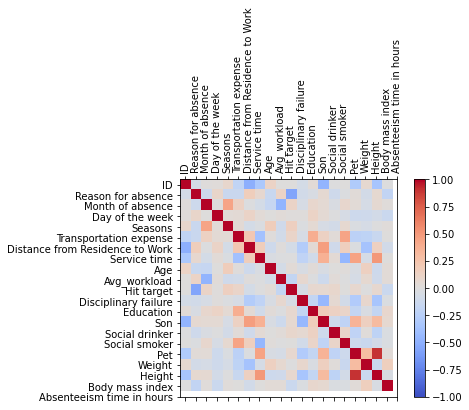

In [22]:
#Checking for corelation for feature selection
corr = Absenteeism_train.corr()
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax) 
ticks = np.arange(0,len(Absenteeism_train.columns),1)
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(Absenteeism_train.columns) 
ax.set_yticklabels(Absenteeism_train.columns) 
plt.show()

In [23]:
#Transform data types
Absenteeism_train['ID'] = Absenteeism_train['ID'].astype('category')
Absenteeism_train['Reason for absence'] = Absenteeism_train['Reason for absence'].astype('category')
Absenteeism_train['Month of absence'] = Absenteeism_train['Month of absence'].astype('category')
Absenteeism_train['Day of the week'] = Absenteeism_train['Day of the week'].astype('category')
Absenteeism_train['Seasons'] = Absenteeism_train['Seasons'].astype('category')
Absenteeism_train['Disciplinary failure'] = Absenteeism_train['Disciplinary failure'].astype('category')
Absenteeism_train['Education'] = Absenteeism_train['Education'].astype('category')
Absenteeism_train['Son'] = Absenteeism_train['Son'].astype('category')
Absenteeism_train['Social drinker'] = Absenteeism_train['Social drinker'].astype('bool')
Absenteeism_train['Social smoker'] = Absenteeism_train['Social smoker'].astype('bool')
Absenteeism_train['Pet'] = Absenteeism_train['Pet'].astype('category')


In [24]:
#Transform data types
Absenteeism_test['ID'] = Absenteeism_test['ID'].astype('category')
Absenteeism_test['Reason for absence'] = Absenteeism_test['Reason for absence'].astype('category')
Absenteeism_test['Month of absence'] = Absenteeism_test['Month of absence'].astype('category')
Absenteeism_test['Day of the week'] = Absenteeism_test['Day of the week'].astype('category')
Absenteeism_test['Seasons'] = Absenteeism_test['Seasons'].astype('category')
Absenteeism_test['Disciplinary failure'] = Absenteeism_test['Disciplinary failure'].astype('category')
Absenteeism_test['Education'] = Absenteeism_test['Education'].astype('category')
Absenteeism_test['Son'] = Absenteeism_test['Son'].astype('category')
Absenteeism_test['Social drinker'] = Absenteeism_test['Social drinker'].astype('bool')
Absenteeism_test['Social smoker'] = Absenteeism_test['Social smoker'].astype('bool')
Absenteeism_test['Pet'] = Absenteeism_test['Pet'].astype('category')

In [25]:
Absenteeism_train = Absenteeism_train.loc[~((Absenteeism_train['Age'] == 0) | (Absenteeism_train['Age'] == 'R'))]
Absenteeism_test = Absenteeism_test.loc[~((Absenteeism_test['Age'] == 0) | (Absenteeism_test['Age'] == 'R'))]

In [26]:
Absenteeism_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               662 non-null    category
 1   Reason for absence               662 non-null    category
 2   Month of absence                 662 non-null    category
 3   Day of the week                  662 non-null    category
 4   Seasons                          662 non-null    category
 5   Transportation expense           662 non-null    int64   
 6   Distance from Residence to Work  662 non-null    int64   
 7   Service time                     662 non-null    int64   
 8   Age                              662 non-null    object  
 9   Avg_workload                     662 non-null    int32   
 10  Hit target                       662 non-null    int32   
 11  Disciplinary failure             662 non-null    category
 12  Educatio

In [27]:
Absenteeism_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Avg_workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,True,False,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,True,False,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,True,False,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,True,True,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,True,False,1,90,172,30,2


In [28]:
Absenteeism_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               74 non-null     category
 1   Reason for absence               74 non-null     category
 2   Month of absence                 74 non-null     category
 3   Day of the week                  74 non-null     category
 4   Seasons                          74 non-null     category
 5   Transportation expense           74 non-null     int64   
 6   Distance from Residence to Work  74 non-null     int64   
 7   Service time                     74 non-null     int64   
 8   Age                              74 non-null     int64   
 9   Avg_workload                     74 non-null     int32   
 10  Hit target                       74 non-null     int64   
 11  Disciplinary failure             74 non-null     category
 12  Education 

In [29]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Avg_workload', 'Transportation expense','Hit target','Weight', 'Height','Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 'Education','Pet', 'Son']

In [30]:
#check invalid date time values.
Absenteeism_train[Absenteeism_train['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Avg_workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [31]:
##check invalid date time values.
Absenteeism_test[Absenteeism_test['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Avg_workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
71,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,True,False,8,98,170,34,0
72,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,True,False,2,100,170,35,0
73,35,0,0,6,3,179,45,14,53,271219,...,0,1,1,False,False,1,77,175,25,0


In [32]:
Absenteeism_test = Absenteeism_test[Absenteeism_test['Month of absence'] != 0]

# Exploratory data Analysis 

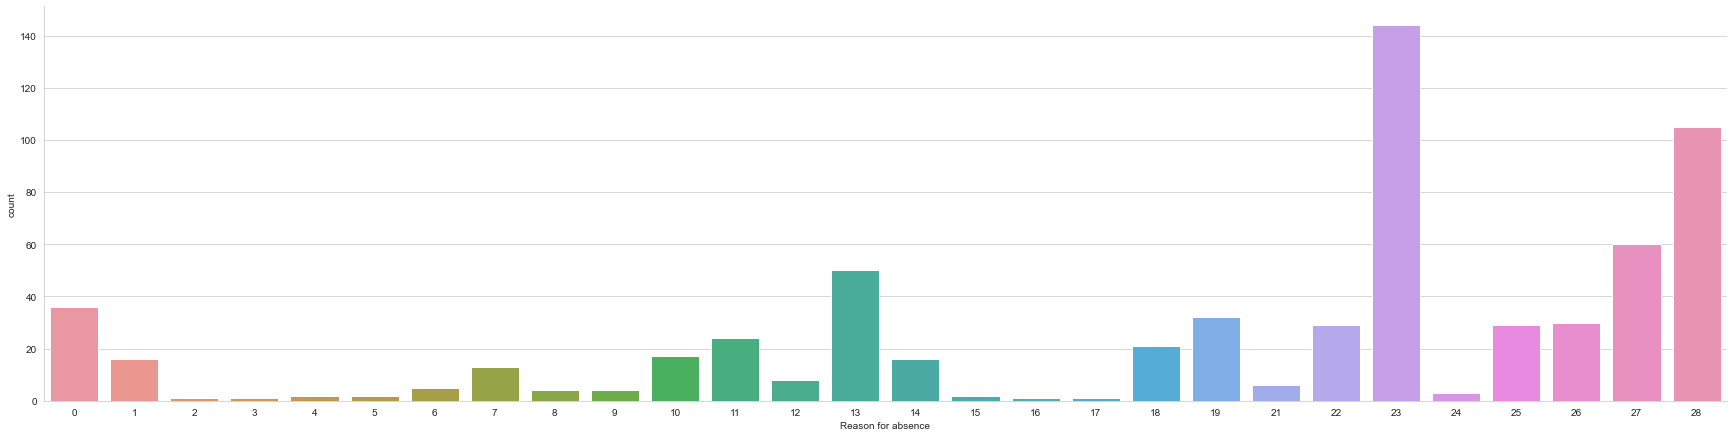

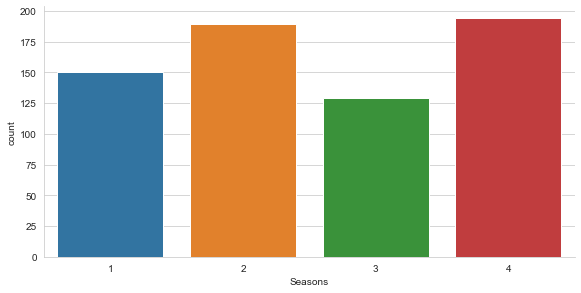

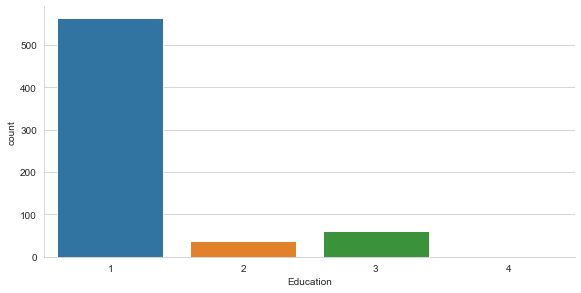

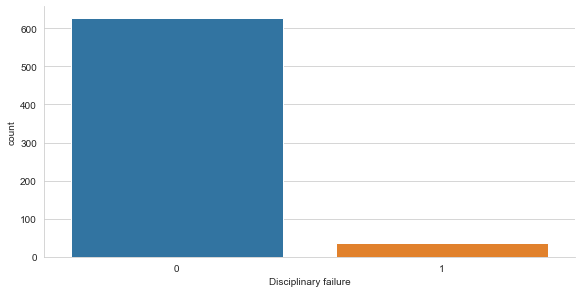

In [33]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.catplot(data=Absenteeism_train, x='Reason for absence', kind= 'count',height=6,aspect=4)
sns.catplot(data=Absenteeism_train, x='Seasons', kind= 'count',height=4,aspect=2)
sns.catplot(data=Absenteeism_train, x='Education', kind= 'count',height=4,aspect=2)
sns.catplot(data=Absenteeism_train, x='Disciplinary failure', kind= 'count',height=4,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

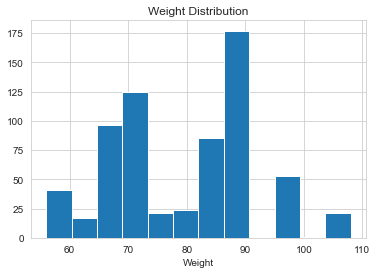

In [34]:
#Check the distribution of numerical data using histogram
plt.hist(data=Absenteeism_train, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Weight Distribution')

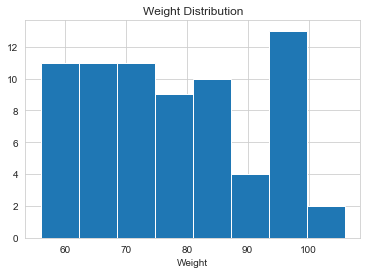

In [35]:
#Check the distribution of numerical data using histogram
plt.hist(data=Absenteeism_test, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

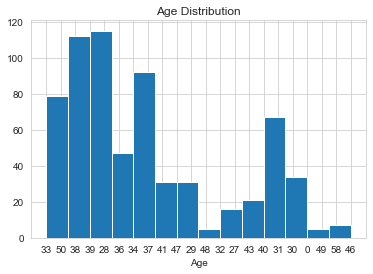

In [36]:
#Check the distribution of numerical data using histogram
plt.hist(data=Absenteeism_train, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution')

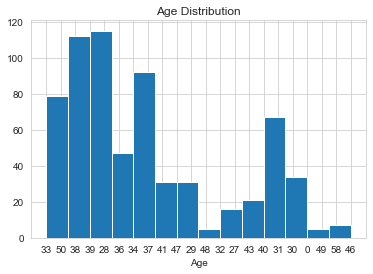

In [37]:
#Check the distribution of numerical data using histogram
plt.hist(data=Absenteeism_train, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution')

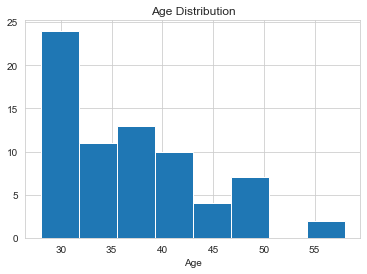

In [38]:
#Check the distribution of numerical data using histogram
plt.hist(data=Absenteeism_test, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

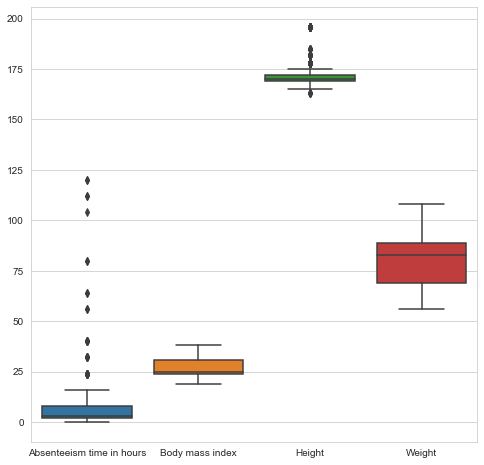

In [39]:
#Check for outliers in data using boxplot
sns.boxplot(data=Absenteeism_train[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

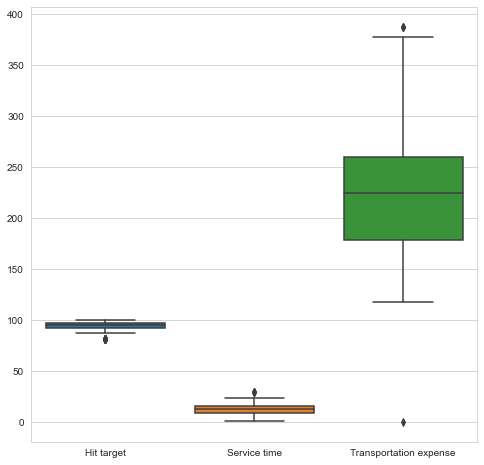

In [40]:
#Check for outliers in data using boxplot
sns.boxplot(data=Absenteeism_train[['Hit target','Service time','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

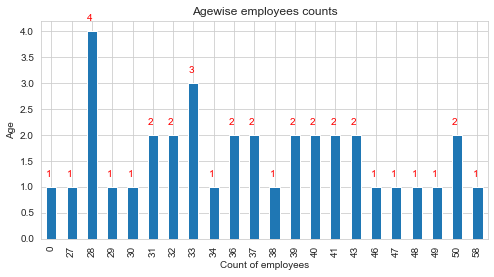

In [41]:
age_employee_count = Absenteeism_train.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_employee_count.plot(kind='bar', figsize=(8,4), legend=False)
for i, v in enumerate(age_employee_count.values):
    ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Count of employees')
ax.set_ylabel('Age')
ax.set_title('Agewise employees counts')
plt.show()

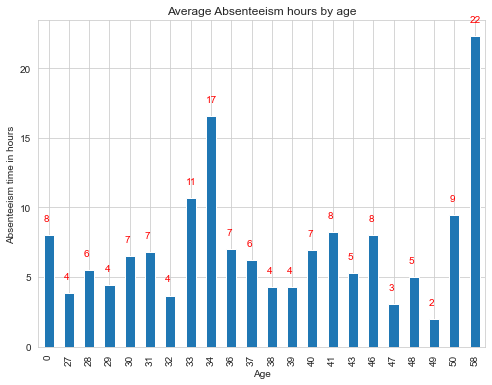

In [42]:
#Average Absenteeism hours by Age¶
Avg_absentism_hrs_Age  = Absenteeism_train.groupby('Age')[['Absenteeism time in hours']].mean()
ax = Avg_absentism_hrs_Age.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(Avg_absentism_hrs_Age.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism hours by age')
plt.show()

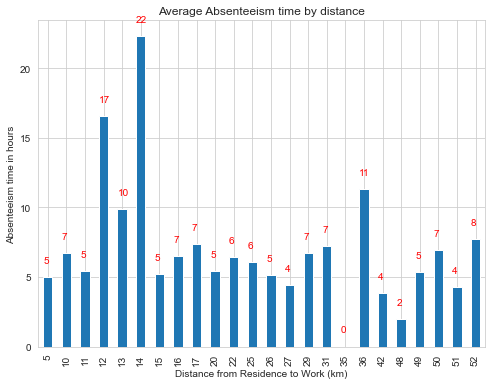

In [43]:
#Average Absenteeism hours by Distance to work¶
Avg_absentism_hrs_dis = Absenteeism_train.groupby('Distance from Residence to Work')[['Absenteeism time in hours']].mean()
ax = Avg_absentism_hrs_dis.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(Avg_absentism_hrs_dis.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time by distance')
plt.show()

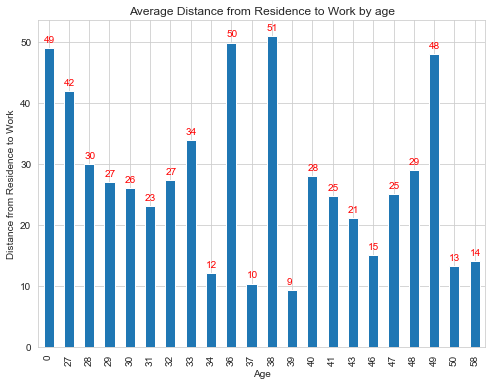

In [44]:
#Average distance to work by Age¶

Avg_dist_age = Absenteeism_train.groupby('Age')[['Distance from Residence to Work']].mean()
ax = Avg_dist_age.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(Avg_dist_age.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Average Distance from Residence to Work by age')
plt.show()

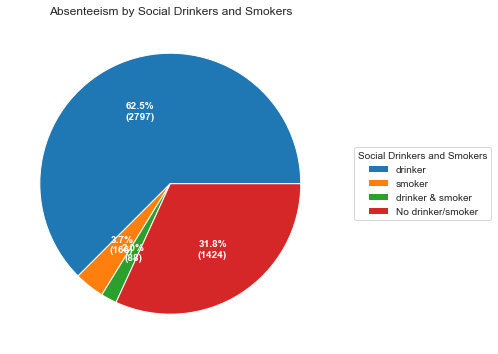

In [45]:
drinker_sum = Absenteeism_train[(Absenteeism_train['Social drinker'] == True) & (Absenteeism_train['Social smoker']==False)]['Absenteeism time in hours'].sum()
smoker_sum = Absenteeism_train[(Absenteeism_train['Social drinker'] == False) & (Absenteeism_train['Social smoker']==True)]['Absenteeism time in hours'].sum()
drinker_smoker_sum = Absenteeism_train[(Absenteeism_train['Social drinker'] == True) & (Absenteeism_train['Social smoker']==True)]['Absenteeism time in hours'].sum()
absent_sum = Absenteeism_train[(Absenteeism_train['Social drinker'] == False) & (Absenteeism_train['Social smoker']==False)]['Absenteeism time in hours'].sum()
absent = [drinker_sum, smoker_sum, drinker_smoker_sum, absent_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absent, autopct=lambda pct: func(pct, absent), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers and Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers and Smokers')
plt.show()

In [46]:
Absenteeism_train1 = Absenteeism_train.copy()

In [47]:
#Mapping the season variable
season_map = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
Absenteeism_train1['season_name'] = Absenteeism_train1.Seasons.map(season_map)
Absenteeism_train1['season_name'] = Absenteeism_train1['season_name'].astype('category')
Absenteeism_train1.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


In [48]:
import calendar
Absenteeism_train1['month_absence'] = Absenteeism_train1['Month of absence'].apply(lambda x: calendar.month_abbr[x])
#Absenteeism_test['month_absence'] = Absenteeism_test['Month of absence'].apply(lambda x: calendar.month_abbr[x])

In [49]:
#Mapping the reason for absence variable for training data
reason_absence_map = {
    0: 'Notknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
Absenteeism_train1['reason_absence'] =Absenteeism_train1['Reason for absence'].map(reason_absence_map)

In [50]:
#Mapping the education variable for training data

education_map = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
Absenteeism_train1['Education_detail'] = Absenteeism_train1['Education'].map(education_map)
education_catagory = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
Absenteeism_train1['Education_detail'] = Absenteeism_train1['Education_detail'].astype(education_catagory)

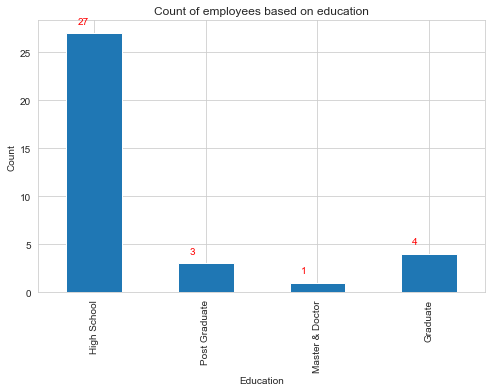

In [51]:
#Employee Count based on education
edu_employee_count = Absenteeism_train1.groupby(['Education_detail']).agg({'ID': pd.Series.nunique})
ax = edu_employee_count.plot(kind='bar', figsize=(8,5), legend=False)
for i, v in enumerate(edu_employee_count.values):
    ax.text(i-.15, v + 1, str(v[0]), color='red')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Count of employees based on education')
plt.show()

In [52]:
#Absenteeism by Reason of absence
Absent_reason = Absenteeism_train1.groupby('reason_absence', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
 display(Absent_reason.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_absence,Absenteeism time in hours
Diseases of the musculoskeletal system and connective tissue,753
"Injury, poisoning and certain other consequences of external causes",609
Medical consultation,408
Dental consultation,318
Diseases of the digestive system,292
Unjustified absence,220
Patient follow-up,218
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",217
Diseases of the skin and subcutaneous tissue,187
Certain infectious and parasitic diseases,182


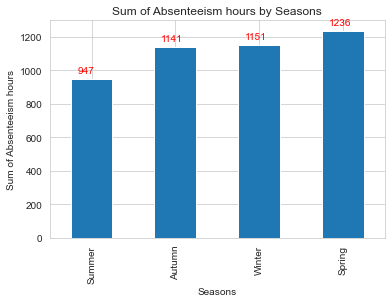

In [53]:
#Absenteeism hours by Seasons
Absent_season = Absenteeism_train1.groupby('season_name')['Absenteeism time in hours'].sum()
ax = Absent_season.plot(kind='bar', figsize=(6,4), legend=False)
for i, v in enumerate(Absent_season.values):
    ax.text(i-.17, v + 35, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Seasons')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Seasons')
plt.show()

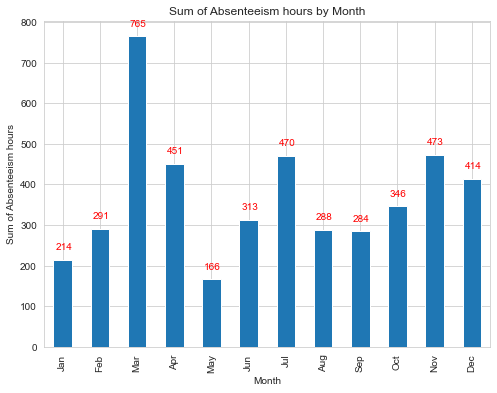

In [54]:
#Absenteeism hours by Month
Absent_month = Absenteeism_train1.groupby('month_absence')['Absenteeism time in hours'].sum()
ax = Absent_month.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(Absent_month.values):
    ax.text(i-0.2, v + 25, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Month')
plt.show()


In [55]:
#March month Absenteeism hours by Reason for absence
Absent_march = Absenteeism_train1[Absenteeism_train1['Month of absence']==3].groupby('reason_absence', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(Absent_march.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_absence,Absenteeism time in hours
"Injury, poisoning and certain other consequences of external causes",147
Diseases of the musculoskeletal system and connective tissue,136
Diseases of the skin and subcutaneous tissue,112
Diseases of the digestive system,72
Patient follow-up,56
Dental consultation,43
Physiotherapy,41
Diseases of the genitourinary system,33
Medical consultation,28
Unjustified absence,16


In [56]:
#November month Absenteeism hours by Reason for absence
Absent_Nov = Absenteeism_train1[Absenteeism_train1['Month of absence']==11].groupby('reason_absence', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(Absent_Nov.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_absence,Absenteeism time in hours
Diseases of the digestive system,131
Diseases of the genitourinary system,47
Diseases of the respiratory system,40
Medical consultation,34
Diseases of the musculoskeletal system and connective tissue,29
Diseases of the eye and adnexa,24
Dental consultation,24
Neoplasms,24
Factors influencing health status and contact with health services,17
Diseases of the nervous system,16


In [57]:
#July month Absenteeism hours by Reason for absence
Absent_July = Absenteeism_train1[Absenteeism_train1['Month of absence']==7].groupby('reason_absence', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(Absent_July.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_absence,Absenteeism time in hours
Diseases of the circulatory system,112
"Injury, poisoning and certain other consequences of external causes",96
Unjustified absence,52
Certain infectious and parasitic diseases,40
Patient follow-up,40
Medical consultation,22
Laboratory examination,17
Diseases of the digestive system,17
Dental consultation,14
Diseases of the eye and adnexa,12


# Feature engineering 

In [58]:
# Creating the target attrubte called  based on the Absenteeism time in hours attribute
pd.options.mode.chained_assignment = None  # default='warn'

conditions = [
(Absenteeism_train['Absenteeism time in hours'] == 0),
((Absenteeism_train['Absenteeism time in hours'] > 0) & (Absenteeism_train['Absenteeism time in hours'] <= 6)),
(Absenteeism_train['Absenteeism time in hours'] > 6),
    ]

# create a list of the values we want to assign for each condition
import numpy as np
values = ['less absent', 'moderate absent','high absent']

# create a new column and use np.select to assign values to it using our lists as arguments
Absenteeism_train['Absenteeism_group'] = np.select(conditions, values)
Absenteeism_train['Absenteeism_group'] = pd.Categorical(Absenteeism_train['Absenteeism_group'])

# display updated DataFrame
#Absenteeism_train = Absenteeism_train.drop(['Absenteeism time in hours'],axis=1)

Absenteeism_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Avg_workload,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism_group
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,True,False,1,90,172,30,4,moderate absent
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,True,False,0,98,178,31,0,less absent
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,True,False,0,89,170,31,2,moderate absent
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,True,True,0,68,168,24,4,moderate absent
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,True,False,1,90,172,30,2,moderate absent


In [59]:
# Creating the target attrubte called  based on the Absenteeism time in hours attribute
conditions = [
(Absenteeism_test['Absenteeism time in hours'] == 0),
((Absenteeism_test['Absenteeism time in hours'] > 0) & (Absenteeism_test['Absenteeism time in hours'] <= 6)),
(Absenteeism_test['Absenteeism time in hours'] > 6),
    ]

# create a list of the values we want to assign for each condition
import numpy as np
values = ['less absent', 'moderate absent','high absent']

# create a new column and use np.select to assign values to it using our lists as arguments
Absenteeism_test['Absenteeism_group'] = np.select(conditions, values)
Absenteeism_test['Absenteeism_group'] = pd.Categorical(Absenteeism_test['Absenteeism_group'])

# display updated DataFrame
#Absenteeism_test = Absenteeism_test.drop(['Absenteeism time in hours'],axis=1)

Absenteeism_test.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Avg_workload,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism_group
0,22,27,4,6,3,179,26,9,30,246288,...,3,0,False,False,0,56,171,19,2,moderate absent
1,28,19,4,2,3,225,26,9,28,246288,...,1,1,False,False,2,69,169,24,8,high absent
2,25,16,4,3,3,235,16,8,32,246288,...,3,0,False,False,0,75,178,25,3,moderate absent
3,22,27,4,6,3,179,26,9,30,246288,...,3,0,False,False,0,56,171,19,2,moderate absent
4,14,28,4,3,3,155,12,14,34,246288,...,1,2,True,False,0,95,196,25,4,moderate absent


In [60]:
target_var = Absenteeism_train['Absenteeism_group']
target_var.value_counts()

moderate absent    384
high absent        241
less absent         37
Name: Absenteeism_group, dtype: int64

In [61]:
target_var = Absenteeism_test['Absenteeism_group']
target_var.value_counts()

moderate absent    38
high absent        29
less absent         4
Name: Absenteeism_group, dtype: int64

In [62]:
df_features1 = Absenteeism_train[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'Age', 'Avg_workload', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 
        'Height' ]]
X_train = df_features1
Y_train = Absenteeism_train['Absenteeism_group']

df_features2 = Absenteeism_test[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'Age', 'Avg_workload', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 
        'Height' ]]

X_test = df_features2
Y_test = Absenteeism_test['Absenteeism_group']

# Model creation and Evaluation 

In [63]:
# Method 1 Design decision tree 
random.seed(1237)
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
modeltree = tree.DecisionTreeClassifier() 
modeltree = modeltree.fit(X_train, Y_train)

##Evaluating Model Performance
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
Y_predicttree = modeltree.predict(X_test) 
print(confusion_matrix(Y_test, Y_predicttree)) 
print(accuracy_score(Y_test, Y_predicttree)*100)
print(classification_report(Y_test, Y_predicttree))

[[22  0  7]
 [ 0  4  0]
 [13  0 25]]
71.83098591549296
                 precision    recall  f1-score   support

    high absent       0.63      0.76      0.69        29
    less absent       1.00      1.00      1.00         4
moderate absent       0.78      0.66      0.71        38

       accuracy                           0.72        71
      macro avg       0.80      0.81      0.80        71
   weighted avg       0.73      0.72      0.72        71



In [64]:
#Method #2. Random forest
random.seed(1236)

from sklearn.ensemble import RandomForestClassifier 
modelrandom = RandomForestClassifier()
modelrandom = modelrandom.fit(X_train, Y_train)
Y_predictrandom = modelrandom.predict(X_test) 
print(confusion_matrix(Y_test, Y_predictrandom)) 
print(accuracy_score(Y_test, Y_predictrandom)*100)
print(classification_report(Y_test, Y_predictrandom))

[[21  0  8]
 [ 0  4  0]
 [11  0 27]]
73.23943661971832
                 precision    recall  f1-score   support

    high absent       0.66      0.72      0.69        29
    less absent       1.00      1.00      1.00         4
moderate absent       0.77      0.71      0.74        38

       accuracy                           0.73        71
      macro avg       0.81      0.81      0.81        71
   weighted avg       0.74      0.73      0.73        71



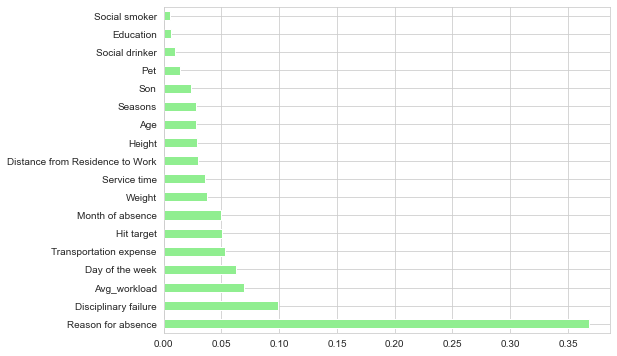

In [65]:
ax = (pd.Series(modelrandom.feature_importances_, index=X_train.columns)
   .nlargest(18)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

In [66]:
#Method #3. KNN
random.seed(1235)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
numbers = LabelEncoder()
#Data preparation
Y1_train = numbers.fit_transform(Absenteeism_train['Absenteeism_group'].astype('str'))
X1_train = scale(X_train) 
Y1_test = numbers.fit_transform(Absenteeism_test['Absenteeism_group'].astype('str'))
X1_test = scale(X_test) 
#Initially start with K=5
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
Pred_y = neigh.predict(X1_test)
print(confusion_matrix(Y1_test, Pred_y))
print("Accuracy of model at K=5 is",metrics.accuracy_score(Y1_test, Pred_y))

[[16  0 13]
 [ 0  4  0]
 [ 8  0 30]]
Accuracy of model at K=5 is 0.704225352112676


Minimum error:- 0.2535211267605634 at K = 11


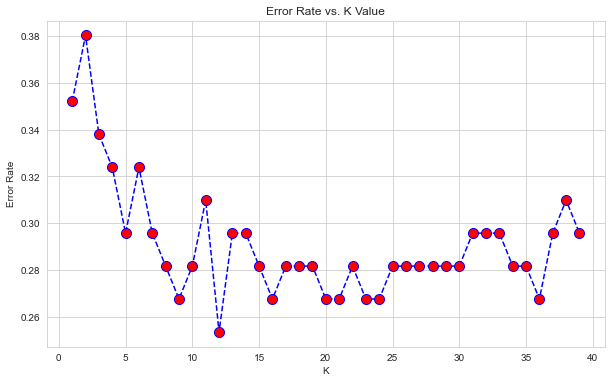

In [67]:
# To improve the model and find out the optimal k value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X1_train,Y1_train)
 pred_i = knn.predict(X1_test)
 error_rate.append(np.mean(pred_i != Y1_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7464788732394366 at K = 11


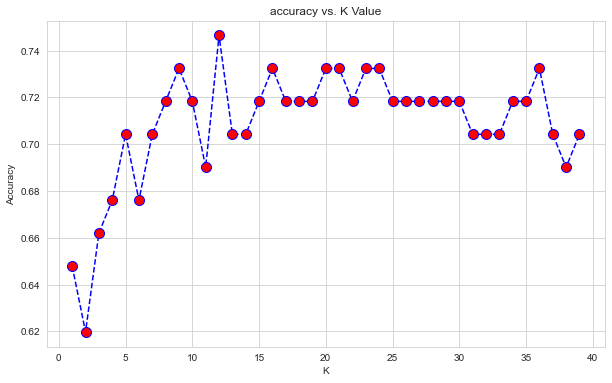

In [68]:
#Further on, we can visualize the plot between accuracy and K value.
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X1_train,Y1_train)
    yhat = neigh.predict(X1_test)
    acc.append(metrics.accuracy_score(Y1_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Now we see the improved results. We got the accuracy of 0.75 at K=11. As we already derived the error plot and got the minimum error at k=12, so we will get better efficiency at that K value. We obtained an accuracy of 0.75 at k=11, which is higher than the efficiency calculated at k=5. The small K value isn’t suitable for classification. The optimal K value usually found is the square root of N, where N is the total number of samples. We used an error plot or accuracy plot to find the most favorable K value.

In [69]:
#Method #4. Naive bayes
random.seed(1238)
from sklearn.naive_bayes import GaussianNB
#Training a model on the data
gnb = GaussianNB() 
gnb = gnb.fit(X_train, Y_train)
##Evaluating Model Performance
y_predict = gnb.predict(X_test) 
print(confusion_matrix(Y_test, y_predict)) 
print(accuracy_score(Y_test, y_predict)*100)
print(classification_report(Y_test, y_predict))

[[15  2 12]
 [ 0  4  0]
 [13  0 25]]
61.97183098591549
                 precision    recall  f1-score   support

    high absent       0.54      0.52      0.53        29
    less absent       0.67      1.00      0.80         4
moderate absent       0.68      0.66      0.67        38

       accuracy                           0.62        71
      macro avg       0.63      0.73      0.66        71
   weighted avg       0.62      0.62      0.62        71

